# 1. Setup

* [NumPy](https://numpy.org/) - The fundamental package for scientific computing with Python
* [pandas](https://pandas.pydata.org/) - Python Data Analysis Library
* [Matplotlib](https://matplotlib.org/) - Visualization with Python
* [Pyplot tutorial](https://matplotlib.org/2.0.2/users/pyplot_tutorial.html) - a tutorial of matplotlib.pyplot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 2. Probability

In [2]:
np.random.randint(1,7) # This is [1,7) in math

2

In [3]:
few_rolls  = np.random.randint(1,7,size=10)
many_rolls = np.random.randint(1,7,size=1000)

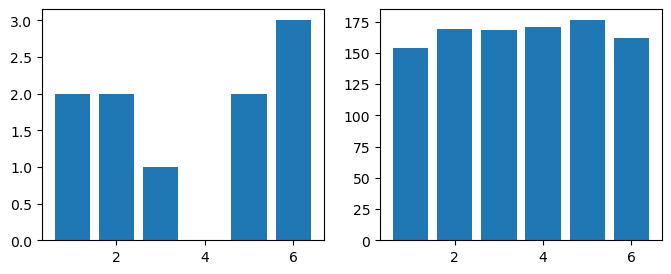

In [4]:
few_counts  = np.histogram(few_rolls,  bins=np.arange(.5, 7.5))[0]
many_counts = np.histogram(many_rolls, bins=np.arange(.5, 7.5))[0]

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(8,3))
ax1.bar(np.arange(1,7), few_counts)
ax2.bar(np.arange(1,7), many_counts);

# 3. Distributions

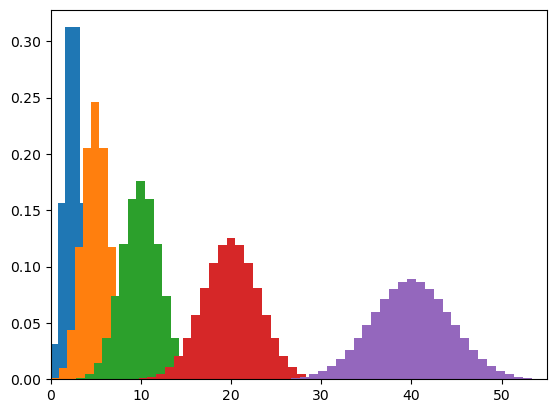

In [5]:
import scipy.stats as ss

b = ss.distributions.binom
for flips in [5, 10, 20, 40, 80]:
    # binomial with .5 is result of many coin flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)
plt.xlim(0,55);

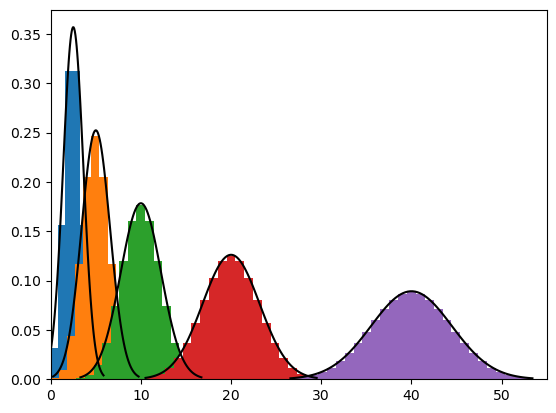

In [6]:
b = ss.distributions.binom
n = ss.distributions.norm

for flips in [5, 10, 20, 40, 80]:
    # binomial coint flips
    success = np.arange(flips)
    our_distribution = b.pmf(success, flips, .5)
    plt.hist(success, flips, weights=our_distribution)

    # normal approximation to that binomial
    # we have to set the mean and standard deviation
    mu      = flips * .5, 
    std_dev = np.sqrt(flips * .5 * (1-.5))
    
    # we have to set up both the x and y points for the normal
    # we get the ys from the distribution (a function)
    # we have to feed it xs, we set those up here
    norm_x = np.linspace(mu-3*std_dev, mu+3*std_dev, 100)
    norm_y = n.pdf(norm_x, mu, std_dev)
    plt.plot(norm_x, norm_y, 'k');

plt.xlim(0,55);

# 4. Dot Products
## 4.1 Linear Combinations
| Product           | Quantity | Cost Per Unit |
| :---------------- | -------: | ------------: |
| Wine              | 2        | 12.50         |
| Orange            | 12       | 0.50          |
| Muffin            | 3        | 1.75          |

In [7]:
# Total cost
2 * 12.5 + 12 * 0.50 + 3 * 1.75

36.25

In [8]:
# element-wise multiplication
quantity = np.array([2, 12, 3]) 
costs    = np.array([12.5, .5, 1.75])
np.sum(quantity * costs) 

36.25

In [9]:
print(quantity.dot(costs),       # dot-product way 1
      np.dot(quantity, costs),   # dot-product way 2 
      quantity @ costs,          # dot-product way 3 
                                 # (new addition to the family!)
      sep='\n')

36.25
36.25
36.25


## 4.2 Weighted Average

In [10]:
values  = np.array([10, 20, 30])
weights  = np.array([1/3, 1/3, 1/3])

print("via mean:", np.mean(values))
print("via weights and dot:", np.dot(weights, values))

via mean: 20.0
via weights and dot: 20.0


In [11]:
values  = np.array([10,  20,  30])
weights = np.array([.5, .25, .25])

np.dot(weights, values)

17.5

In [12]:
                  # odd, even
payoffs = np.array([1.0, -.5])
probs   = np.array([ .5,  .5])

np.dot(payoffs, probs)

0.25

In [13]:
def is_even(n):
    # if remainder 0, value is even
    return n % 2 == 0  

winnings = 0.0
for toss_ct in range(10000):
    die_toss = np.random.randint(1,7)
    winnings += 1.0 if die_toss % 2 == 0 else -0.5
print(winnings)

2497.0


## 4.3 Sum of Squares

In [14]:
values = np.array([5, -3, 2, 1])
squares = values * values # element wise multiplication
print(squares, 
      np.sum(squares),   # sum-of-squares
      np.dot(values, values), sep="\n")

[25  9  4  1]
39
39


## 4.4 Sum of Squared Errors

In [15]:
errors = np.array([5, -5, 3.2, -1.1])
display(pd.DataFrame({'errors':errors,
                      'squared':errors*errors}))

,errors,squared
0,5.0,25.00
1,-5.0,25.00
2,3.2,10.24
3,-1.1,1.21


In [16]:
np.dot(errors, errors)

61.45

# 5. A Geometric View
* Cost of Parking = \$40
* Cost of Ticket = \$80 per ticket
* Cost of Beer = \$10 per beer

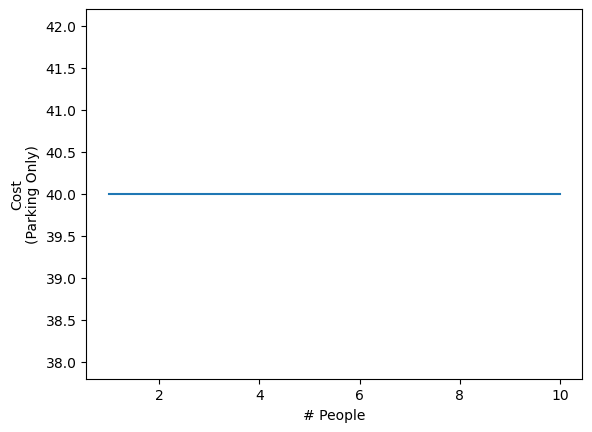

In [17]:
people = np.arange(1,11)
total_cost = np.ones_like(people) * 40
ax = plt.gca()

ax.plot(people, total_cost)
ax.set_xlabel("# People")
ax.set_ylabel("Cost\n(Parking Only)");

In [18]:
people = np.arange(1,11)
total_cost = 80 * people + 40

In [19]:
# .T (transpose) to save vertical space in print out
display(pd.DataFrame({'total_cost':total_cost.astype(np.int_)}, 
                     index=people).T)

,1,2,3,4,5,6,7,8,9,10
total_cost,120,200,280,360,440,520,600,680,760,840


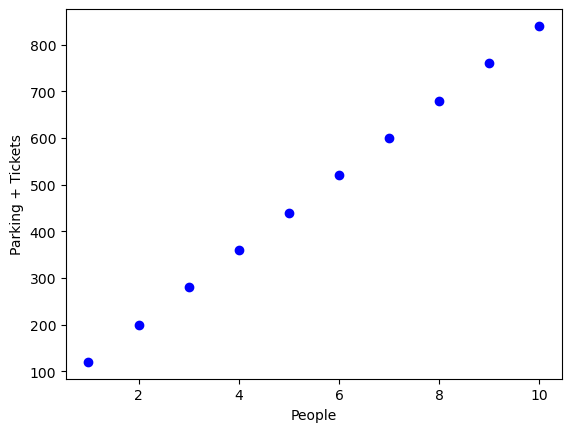

In [20]:
ax = plt.gca()
ax.plot(people, total_cost, 'bo') # o means a dot, b stands for blue; try bs, ro, g^, 
ax.set_ylabel("Parking + Tickets")
ax.set_xlabel("People");

In [21]:
number_people = np.arange(1,11) # 1-10 people
number_rbs    = np.arange(0,20) # 0-19 rootbeers

# numpy tool to get cross-product of values (each against each)
# in two paired arrays.  try out: np.meshgrid([1,2], [3,4,5])
# "perfect" for functions of multiple variables
number_people, number_rbs = np.meshgrid(number_people, number_rbs) 

total_cost = 80 * number_people + 10 * number_rbs + 40

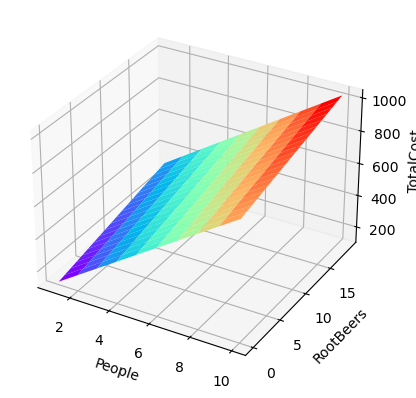

In [22]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(number_people, number_rbs, total_cost, cmap='rainbow')
# ax.scatter(number_people, number_rbs, total_cost)
ax.set_xlabel("People")
ax.set_ylabel("RootBeers")
ax.set_zlabel("TotalCost")
plt.show()

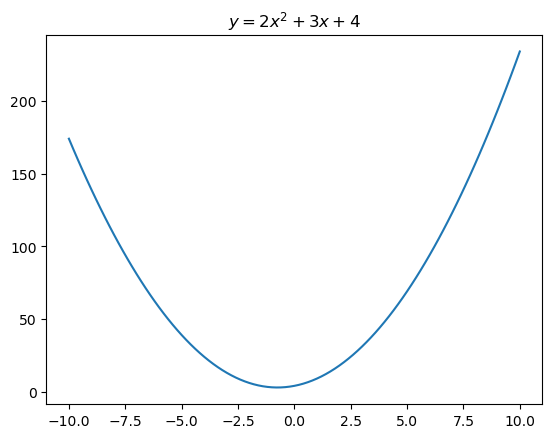

In [23]:
plt.Figure((2,1.5))

xs = np.linspace(-10,10,101)
coeffs = np.array([2,3,4])
ys = np.dot(coeffs, [xs**2, xs**1, xs**0])

# nice parabola via a dot-product
ax = plt.gca()
ax.plot(xs, ys)
ax.set_title("$y=2x^2+3x+4$");

# 6. More about Dot Product

In [24]:
oned_vec = np.arange(5)
print(oned_vec, "-->", oned_vec * oned_vec)
print("self dot:", np.dot(oned_vec, oned_vec))

[0 1 2 3 4] --> [ 0  1  4  9 16]
self dot: 30


In [25]:
row_vec = np.arange(5).reshape(1,5) # it becomes a 1x5 matrix
col_vec = np.arange(0, 50, 10).reshape(5,1) # it becomes a 5x1 matrix
print("row vec:", row_vec, 
      "col vec:", col_vec, 
      "row vec [dot] col vec:", np.dot(row_vec, col_vec), 
      "col vec [dot] row vec:", np.dot(col_vec, row_vec), 
      sep='\n')

row vec:
[[0 1 2 3 4]]
col vec:
[[ 0]
 [10]
 [20]
 [30]
 [40]]
row vec [dot] col vec:
[[300]]
col vec [dot] row vec:
[[  0   0   0   0   0]
 [  0  10  20  30  40]
 [  0  20  40  60  80]
 [  0  30  60  90 120]
 [  0  40  80 120 160]]


In [26]:
oned_vec = np.arange(5)
row_vec = np.arange(0,5).reshape(1,5)
col_vec = np.arange(0, 50, 10).reshape(5,1)

print("array:", oned_vec.shape,
      "row vec:", row_vec.shape,
      "col vec:", col_vec.shape, sep="\n")

array:
(5,)
row vec:
(1, 5)
col vec:
(5, 1)


In [27]:
np.dot(row_vec, oned_vec) 

array([30])

In [28]:
try: np.dot(col_vec, oned_vec) 
except ValueError as e: print("failed:", e)

failed: shapes (5,1) and (5,) not aligned: 1 (dim 1) != 5 (dim 0)


In [29]:
np.dot(oned_vec, col_vec) 

array([300])

In [30]:
try: np.dot(oned_vec, row_vec) 
except ValueError as e: print("failed:", e)

failed: shapes (5,) and (1,5) not aligned: 5 (dim 0) != 1 (dim 0)


In [31]:
D = np.array([[1,3],
              [2,5],
              [2,7],
              [3,2]])
w = np.array([1.5, 2.5])

print("D:", D.shape,
      "w:", w.shape, sep="\n")

D:
(4, 2)
w:
(2,)


In [32]:
np.dot(D,w)

array([ 9. , 15.5, 20.5,  9.5])

In [33]:
try: 
    np.dot(w,D)
except ValueError as e:  
    print("failed:", e)

failed: shapes (2,) and (4,2) not aligned: 2 (dim 0) != 4 (dim 0)


# 7. Floating-Point Issues
Here are a few facts:
1. Computer memory is finite. We can’t physically store an infinite number of digits for any numerical value.
2. Some numbers that interest us have an infinite number of decimal places (1/9 and π).
3. Computers store all of their information in bits—that’s base-2 numbers, or binary.
4. There are different infinite-digit numbers when we write them in decimal versus binary.

Because of points one and two, we have to approximate the values we store. We can get close, but we can never be exact. Because of points three and four, when we convert from a seemingly innocent decimal number like 3.3 to binary, it may become much more complicated—it might have repeating digits, like 1/9 does in a decimal representation.

In [34]:
1.1 + 2.2 == 3.3

False

In [35]:
type(1.1), type(2.1), type(1.1+2.1), type(3.3)

(float, float, float, float)

In [36]:
np.allclose(1.2 + 2.1, 3.3)

True